# Artificial Neural Networks

## Introduction

We will create an ANN in Python following OOP framework.
This means, we will build our ANN as a class we can build objects inheriting its methods.  

Remember, there is no magic, just intelligence! Read the detailed theory in this document LINKS, we will use the same notation in this notebook.

## Create Artificial Neural Network

The ecuations we need to know behore hand can be founded in the document in this folder: ANN Equations. We will reference those equation in the code, therefore, I recommend you to split you screen and follow both together.  
We will be following the next scheme:

<img src="../Images/ANN.png">

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from scipy import optimize
import matplotlib.pyplot as plt
import time

### Create Neural Network Class

In [2]:
class Neural_Network(object):
    
    def __init__(self):
        # Define the layers we are going to have and the neurons in each layer
        self.inputLayerSize = x_train.shape[1]
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1 

        # Weights initialization 
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)

    def forward(self, X):
        # Propagate inputs through neurons
        self.z2 = np.dot(X, self.W1)       # Eq. 1
        self.a2 = self.sigmoid(self.z2)    # Eq. 2
        self.z3 = np.dot(self.a2, self.W2) # Eq. 3
        yHat = self.sigmoid(self.z3)       # Eq. 4
        return yHat

    def sigmoid(self, z):   
        # Sigmoid activaction function
        return 1 / (1+np.exp(-z))

    def dSigmoid(self, z):
        # Derivative of sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)

    ''' You can also try with different activation function and see how it performs!
    def relu(self, z):
        # Rectifier Linear Unit activaction funciton
        return np.max(0, z)

    def dRelu(self, z):
        # Derivative of sigmoid function
        if z > 0: return 1
        else: return 0
    '''    
    
    def costFunction(self, X, y):
        # Compute the Cost Function using weights already stored in class
        self.yHat = self.forward(X)
        
        J = np.sum((y - self.yHat)**2) / X.shape[0] # Eq. 6
        return J     

    def dCostFunction(self, X, y):
        # Compute derivative with respect to W1 and W2 
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), self.dSigmoid(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3) / X.shape[0] # Eq. 7

        delta2 = np.dot(delta3, self.W2.T) * self.dSigmoid(self.z2)
        dJdW1 = np.dot(X.T, delta2) / X.shape[0]    # Eq. 8

        return dJdW1, dJdW2

    def getWeights(self):
        # Get W1 and W2
        return self.W1, self.W2
    
    def setWeights(self, W1, W2):
        # Update the weights W1 and W2
        self.W1 = W1
        self.W2 = W2
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.dCostFunction(X, y)
        return dJdW1, dJdW2


### Define our Training Methodology

In [3]:
class trainer(object):
     
    def __init__(self, N):
        # Reference the Neural Network that will be trained:
        self.N = N

    def callbackF(self, W1, W2):
        # Callback function to track the J as we train the NN
        self.N.setWeights(W1, W2)                                      # Set the new parameters coming from training
        self.J.append(self.N.costFunction(self.X, self.y))             # Insert new value of Cost to the Cost vector
        self.testJ.append(self.N.costFunction(self.testX, self.testY)) # Insert new value of Test-Cost to the Test-Cost vector

    def updateWeigths(self, W1, W2, grad1, grad2):
        W1 = W1 - self.learning_rate * grad1
        W2 = W2 - self.learning_rate * grad2
        return W1, W2
        
    def train(self, trainX, trainY, testX, testY, epochs, learning_rate = 0.01):
        # Make internal variables for callback function
        self.X = trainX
        self.y = trainY
        self.testX = testX
        self.testY = testY
        self.epochs = range(epochs)
        self.learning_rate = learning_rate

        #Make empty list to store the costs:
        self.J     = []
        self.testJ = []

        for epoch in self.epochs:
            cost = self.N.costFunction(self.X, self.y)
            grad1, grad2 = self.N.computeGradients(self.X, self.y)
            W1, W2 = self.N.getWeights()
            W1, W2 = self.updateWeigths(W1, W2, grad1, grad2)            
            # Update the weights
            self.N.setWeights(W1, W2)
            self.callbackF(W1, W2)


# Testing

### Let's create our data

In [4]:
dataset = np.random.randn(100, 5)*30
df_dataset = pd.DataFrame(dataset)
df_dataset.head()

,0,1,2,3,4
0,0.287613,11.843398,-23.111000,-26.784964,35.887831
1,-12.942548,-9.288027,-29.954254,36.694911,-33.618653
2,-11.743498,13.198859,17.154367,-9.360629,51.557494
3,1.619156,-22.496186,-17.912477,36.132983,32.243452
4,6.606882,-22.517781,23.364357,-3.593449,-24.734984


In [5]:
X = np.array(dataset)
Y = X[:,1] + 2*X[:,2] + 56*X[:,4] - X[:,2]*np.power(X[:,3], 2) + np.log(np.power(X[:,1], 100)) + 50*np.random.randn(100)
Y[:5]

array([ 18879.7238798 ,  38543.80025093,   1664.30263516,  25498.57575526,
        -1362.18909605])

### Normalization

In [6]:
# Normalization:
scalatorX = preprocessing.MinMaxScaler()

def scale(vector):
    # Function to scale a vector to range [0 1]
    maxs = np.max(vector)
    mins = np.min(vector)
    scaling = np.zeros(len(vector))
    
    for i in range(0, len(vector)):
        scaling[i] = (vector[i] - mins) / (maxs - mins)
    return scaling
    
def unScale(scal, unscal):
    # Unscale function to a vector giving the scaled and an unscaled reference vector
    maxs = np.max(unscal)
    mins = np.min(unscal)
    unscaling = np.zeros(len(scal))
    
    for i in range(0, len(scal)):    
        unscaling[i] = scal[i] * (maxs-mins) + mins
    return unscaling

x = scalatorX.fit_transform(X)
y = scale(Y)
# y = scalatorY.fit_transform(Yreshape(-1, 1))

# Normalization of test data:
y[:10]

array([ 0.22330444,  0.2638671 ,  0.18779282,  0.23695768,  0.18154983,
        0.20482247,  0.18288122,  0.13844135,  0.18101974,  0.1846012 ])

### Divide into Train and Test Sets

In [29]:
from sklearn.model_selection import train_test_split as split
x_train, x_test, y_train, y_test = split(X, y, test_size=0.3, random_state=2017)
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))
print('x_train:', x_train.shape)
print('x_test:',  x_test.shape)
print('y_train:', y_train.shape)
print('y_test:',  y_test.shape)
y_test[:10]

x_train: (70, 5)
x_test: (30, 5)
y_train: (70, 1)
y_test: (30, 1)


array([[ 0.        ],
       [ 0.17994662],
       [ 0.17904877],
       [ 0.20482247],
       [ 0.13782762],
       [ 0.18860265],
       [ 0.18621815],
       [ 0.1854796 ],
       [ 0.1232883 ],
       [ 0.21130993]])

In [30]:
trainX = np.array(([3,5], [5,1], [10,2], [6,1.5]), dtype=float)
trainY = np.array(([75], [82], [93], [70]), dtype=float)

# Testing Data:
testX = np.array(([4, 5.5], [4.5,1], [9,2.5], [6, 2]), dtype=float)
testY = np.array(([70], [89], [85], [75]), dtype=float)

print('trainX:', trainX.shape)
print('testX:',  testX.shape)
print('trainY:', trainY.shape)
print('testY:',  testY.shape)
testY

trainX: (4, 2)
testX: (4, 2)
trainY: (4, 1)
testY: (4, 1)


array([[ 70.],
       [ 89.],
       [ 85.],
       [ 75.]])

In [31]:
NN = Neural_Network() # Create an object NN 
T = trainer(NN)       # Create an object trainer for that NN created
T.train(x_train, y_train, x_test, y_test, 200) # Pass data and epochs to the training method

## Visualize the results!

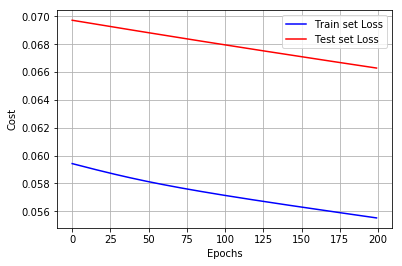

In [32]:
plt.plot(T.J, 'b-', label='Train set Loss')
plt.plot(T.testJ, 'r-', label='Test set Loss')
plt.grid(1)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

Note that it takes a lot of epochs to reduce the error (even we are in a range between 4-6%)  
This can be improved if we declare a batch size for the inputs!   
This means, that all the inputs in a batch are going to be computed, and then we will average the error and update the weights. This way, the weights are updated several times inside 1 epoch.

### Create the batches

In [ ]:
class trainer(object):
     
    def __init__(self, N):
        # Reference the Neural Network that will be trained:
        self.N = N

    def callbackF(self, W1, W2):
        # Callback function to track the J as we train the NN
        self.N.setWeights(W1, W2)                                      # Set the new parameters coming from training
        self.J.append(self.N.costFunction(self.X, self.y))             # Insert new value of Cost to the Cost vector
        self.testJ.append(self.N.costFunction(self.testX, self.testY)) # Insert new value of Test-Cost to the Test-Cost vector

    def updateWeigths(self, W1, W2, grad1, grad2):
        W1 = W1 - self.learning_rate * grad1
        W2 = W2 - self.learning_rate * grad2
        return W1, W2
    
    def bucketize(vector, bucket_size):
        x = 
        
    def train(self, trainX, trainY, testX, testY, epochs, batch_size, learning_rate=0.01):
        # Make internal variables for callback function
        self.epochs = range(epochs)
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        self.X = trainX
        self.y = trainY
        self.testX = testX
        self.testY = testY
        

        #Make empty list to store the costs:
        self.J     = []
        self.testJ = []

        for epoch in self.epochs:
            cost = self.N.costFunction(self.X, self.y)
            grad1, grad2 = self.N.computeGradients(self.X, self.y)
            W1, W2 = self.N.getWeights()
            W1, W2 = self.updateWeigths(W1, W2, grad1, grad2)            
            # Update the weights
            self.N.setWeights(W1, W2)
            self.callbackF(W1, W2)


## Regularization -- Solve overfitting problem

Regularization is a simple technique that penalize complex model, helping us to avoid overfitting. 

Note how we are going to insert a little term into our cost function, and therefore, in its derived.

In [ ]:
class Neural_Network_Regularized(object):
    
    def __init__(self, Lambda=0):
        # Define Hyperparamethers
        self.inputLayerSize = 2  # trainX.shape[1] = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1 

        # Weights initialization 
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)  
        
        # Regularization Parameter:
        self.Lambda = Lambda
            
    def forward(self, X):
        # Propagate inputs through neurons
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):   
        # Sigmoid activaction function
        return 1 / (1+np.exp(-z))

    def dSigmoid(self, z):
        # Derivative of sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        # Rectifier Linear Unit activaction funciton
        return np.max(0, z)

    def dRelu(self, z):
        # Derivative of sigmoid function
        if z > 0: return 1
        else: return 0
        
    def costFunction(self, X, y):
        # Compute the Cost Function using weights already stored in clas
        self.yHat = self.forward(X)
        
        J = np.sum((y-self.yHat)**2) / X.shape[0] + (self.Lambda/2) * (np.sum(self.W1**2) + np.sum(self.W2**2))
        return J     

    def dCostFunction(self, X, y):
        # Compute derivative with respect to W1 and W2
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), self.dSigmoid(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3) / X.shape[0] + self.Lambda*self.W2

        delta2 = np.dot(delta3, self.W2.T)*self.dSigmoid(self.z2)
        dJdW1 = np.dot(X.T, delta2) / X.shape[0] + self.Lambda*self.W1

        return dJdW1, dJdW2

    # Helper functions for interacting with other classes
    def getParameters(self):
        # Get W1 and W2
        parameters = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return parameters
    
    def setParameters(self, parameters):
        # Update the weights W1 and W2. ''Note we are passing 1D vector, we'll need to reshape
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(parameters[W1_start:W1_end], (self.inputLayerSize, self.hiddenLayerSize))

        W2_end = W1_end + self.hiddenLayerSize * self.outputLayerSize
        self.W2 = np.reshape(parameters[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))

    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.dCostFunction(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [ ]:
NN = Neural_Network_Regularized(Lambda=0.0001)
T = trainer(NN)
T.train(trainX, trainY, testX, testY, 200) # Pass data and epochs to the training method

In [ ]:
plt.plot(T.J, 'b-', label='Train set Loss')
plt.plot(T.testJ, 'r-', label='Test set Loss')
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()